In [1]:
from dotenv import load_dotenv
import os
from openai import OpenAI
from pathlib import Path

load_dotenv()

openai_api_key = os.getenv('OPENAI_API_KEY')

openai_client = OpenAI(api_key=openai_api_key)

In [2]:
# Create necessary directories
input_image_path = Path("input_images")
data_path = Path("mixed_wiki")

for path in [input_image_path, data_path]:
    if not path.exists():
        Path.mkdir(path)

print("Environment prepared successfully!")

Environment prepared successfully!


In [3]:
!wget "https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj" -O ./input_images/long_range_spec.png
!wget "https://docs.google.com/uc?export=download&id=19pLwx0nVqsop7lo0ubUSYTzQfMtKJJtJ" -O ./input_images/model_y.png
!wget "https://docs.google.com/uc?export=download&id=1utu3iD9XEgR5Sb7PrbtMf1qw8T1WdNmF" -O ./input_images/performance_spec.png
!wget "https://docs.google.com/uc?export=download&id=1dpUakWMqaXR4Jjn1kHuZfB0pAXvjn2-i" -O ./input_images/price.png
!wget "https://docs.google.com/uc?export=download&id=1qNeT201QAesnAP5va1ty0Ky5Q_jKkguV" -O ./input_images/real_wheel_spec.png

--2024-07-18 09:44:44--  https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj
Resolving docs.google.com (docs.google.com)... 64.233.180.102, 64.233.180.138, 64.233.180.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.180.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download [following]
--2024-07-18 09:44:45--  https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160684 (157K) [image/png]
Saving to: ‘./input_images/long_range_spec.png’

./input_images/long 100%[===================>] 156.92K   836KB/

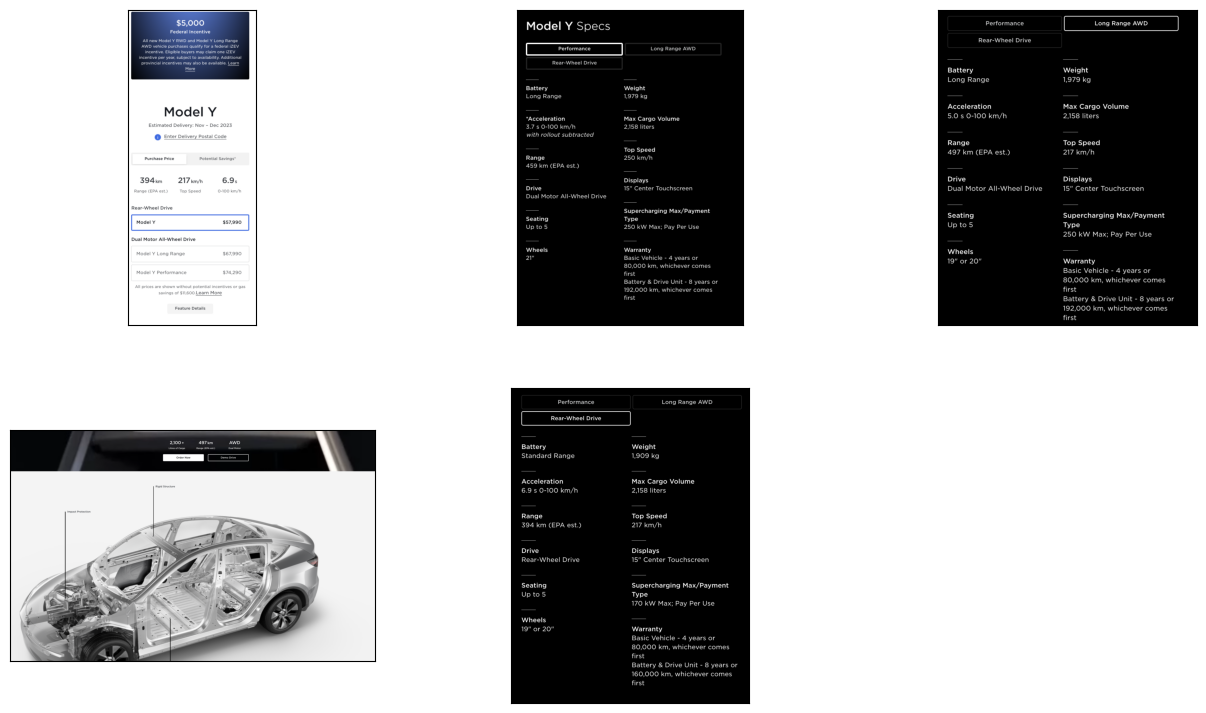

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir("./input_images"):
    image_paths.append(str(os.path.join("./input_images", img_path)))


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

In [5]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./input_images").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=1500
)

response_1 = openai_mm_llm.complete(
    prompt="Generate detailed text description for each image.",
    image_documents=image_documents,
)

print(response_1)

NameError: name 'OPENAI_API_KEY' is not defined